/var/folders/3f/d8gl3k3j0bn3wk_cqjvfm31w0000gn/T/ipykernel_8471/1629027815.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X_1 = np.random.multivariate_normal(mean_1, cov_1, N_1)


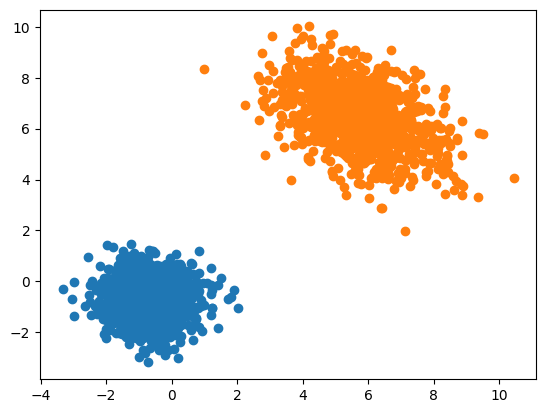

In [1]:
import numpy as np
from matplotlib import pyplot as plt

dim = 2
N_1 = 1000
N_2 = 1000
N = N_1 + N_2

mean_1 = np.random.randn(dim)
M_1 = np.random.randn(dim, dim)
cov_1 = M_1 * M_1.T
X_1 = np.random.multivariate_normal(mean_1, cov_1, N_1)

mean_2 = np.random.randn(dim) + 6
M_2 = np.random.randn(dim, dim)
cov_2 = M_2 * M_2.T
X_2 = np.random.multivariate_normal(mean_2, cov_2, N_2)

X = np.vstack([X_1, X_2])

plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])

In [2]:
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix

k = 2
N, dim = X.shape
epsilon = 1e-6

means = [np.random.randn(dim) for _ in range(k)]
covs = [make_spd_matrix(dim) for _ in range(k)]
coeffs = [np.random.rand() for _ in range(k-1)]
coeffs.append(1 - sum(coeffs))
old_log_likelilhood = np.sum(np.log(sum([multivariate_normal(means[idx], covs[idx]).pdf(X) * coeffs[idx] for idx in range(k)])))

for epoch in range(1000):
    ## Expectation Step
    probs = [multivariate_normal(means[idx], covs[idx]).pdf(X) * coeffs[idx] for idx in range(k)]
    probs = [probs[idx] / sum(probs) for idx in range(k)]
    normalization = [sum(probs[idx]) for idx in range(k)]
    ## Maximixation Step
    means = [np.sum(probs[idx][:, None] * X, axis=0) / normalization[idx] for idx in range(k)]
    covs = [np.sum(probs[idx][:, None, None] * (X - means[idx])[:, :, None] * (X - means[idx])[:, None, :] , axis=0) / normalization[idx] for idx in range(k)]
    coeffs = [normalization[idx] / N for idx in range(k)]
    log_likelilhood = np.sum(np.log(sum([multivariate_normal(means[idx], covs[idx]).pdf(X) * coeffs[idx] for idx in range(k)])))
    if np.abs(log_likelilhood - old_log_likelilhood < epsilon):
        break
    old_log_likelilhood = log_likelilhood


In [3]:
print(mean_1, mean_2)
print(means[0], means[1])
print(means[0] - mean_1, means[1] - mean_2)
print(cov_1, cov_2)
print(covs[0], covs[1])
print(covs[0] - cov_1, covs[1] - cov_2)

[-0.65487127 -0.68099633] [5.60791712 6.44139687]
[5.67646067 6.45514026] [-0.6546844  -0.68178665]
[6.33133194 7.13613659] [-6.26260153 -7.12318353]
[[ 0.00122302 -0.55422541]
 [-0.55422541  0.07782451]] [[ 1.65713419 -0.7231663 ]
 [-0.7231663   1.4693451 ]]
[[ 1.65322543 -0.68958073]
 [-0.68958073  1.50004115]] [[ 0.57124148 -0.02652053]
 [-0.02652053  0.5938142 ]]
[[ 1.65200241 -0.13535532]
 [-0.13535532  1.42221664]] [[-1.08589272  0.69664578]
 [ 0.69664578 -0.87553091]]
